# AML 2203 Advanced Python AI and ML Tools - Final Project

## Topic : Telecom Churn Analysis

**Team Members :**

**Anto Francis (C0825095)**

**Omer Volkan (C0831373)**

**Rupesh Chandran (C0826779)**

**Sachin Sreekumar (C0825096)**


###### Project Report: https://mylambton-my.sharepoint.com/:b:/g/personal/c0825096_mylambton_ca/ESL7KsOIzvZNhsEHLjoEdSoBSNtuRBZ8dH5mB2CskJkZiA?e=MMAS9C

###### Dataset URL: https://mylambton-my.sharepoint.com/:x:/g/personal/c0825096_mylambton_ca/EW2ENZi_pHtOvJN5_ZKD6hMBSZEzslWSMx_OEGW-9X6NUQ?e=XPKUUy

In [117]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install imblearn

In [4]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [5]:
churn_dataset = pd.read_csv("telecom_churn_data.csv")

In [6]:
churn_dataset_backup = churn_dataset.copy()

In [7]:
#Setting display to show all the columns
pd.set_option("display.max_columns", None)

In [8]:
churn_dataset.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

**Here, numbers denotes months : 6 -> June
7 -> July
8 -> Aug
9 -> Sep**

In [9]:
churn_dataset.shape

(99999, 226)

In [10]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
churn_dataset.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

**Filtering premium customers**

In [12]:
#Customers who uses the premium plans are important to focus on. Here we are going to focus on the premium customers who recharge more than or equal 
#to the amount they have recharged in the previous months

#We are finding out the total amount user spent on recharging data each month. 
#We are calculating it by multiplying the number of times customer recharged the data with average amount of his data plans


churn_dataset['total_data_rech_amt_6'] = churn_dataset['av_rech_amt_data_6'] * churn_dataset['total_rech_data_6']
churn_dataset['total_data_rech_amt_7'] = churn_dataset['av_rech_amt_data_7'] * churn_dataset['total_rech_data_7']
churn_dataset['total_data_rech_amt_8'] = churn_dataset['av_rech_amt_data_8'] * churn_dataset['total_rech_data_8']
churn_dataset['total_data_rech_amt_9'] = churn_dataset['av_rech_amt_data_9'] * churn_dataset['total_rech_data_9']

churn_dataset.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,N

In [13]:
#Now, we don't need columns av_rech_amt_data and total_rech_data for each months. Hence we can drop those 8 columns

churn_dataset.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)
churn_dataset.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'],axis = 1,inplace = True)

churn_dataset.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014

In [14]:
#Now, let's find out the average total amount spend by customer in the first two months by adding the amount spend on Data, calling and SMS


#Before that, let's fill all the null values in those columns with 0

churn_dataset['total_rech_amt_6'] = churn_dataset['total_rech_amt_6'].fillna(0)
churn_dataset['total_rech_amt_7'] = churn_dataset['total_rech_amt_7'].fillna(0)
churn_dataset['total_data_rech_amt_6'] = churn_dataset['total_data_rech_amt_6'].fillna(0)
churn_dataset['total_data_rech_amt_7'] = churn_dataset['total_data_rech_amt_7'].fillna(0)

churn_dataset[['total_rech_amt_6','total_rech_amt_7','total_data_rech_amt_6','total_data_rech_amt_7']].isnull().sum()

total_rech_amt_6         0
total_rech_amt_7         0
total_data_rech_amt_6    0
total_data_rech_amt_7    0
dtype: int64

In [15]:
#Finding out the total amount

telecom_avg_rech_67 = (churn_dataset['total_rech_amt_6'] + churn_dataset['total_rech_amt_7'] +
                       churn_dataset['total_data_rech_amt_6']+ churn_dataset['total_data_rech_amt_7'])/2

telecom_avg_rech_67

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Length: 99999, dtype: float64

In [16]:
#We consider the premium customers as those who spend more than or equal to 70th percentile of 
#average recharge amount in first two months

#So, let's find out the 70th percentile in the average amount

per_avg_70 = np.percentile(telecom_avg_rech_67, 70.0)
print("70th Percentile in average amount:",per_avg_70)

70th Percentile in average amount: 478.0


In [17]:
#Now, let's take the customer data where average spent is more than or equal to 70th  percentile

telecom_premium_cust = churn_dataset[telecom_avg_rech_67 >= per_avg_70]
telecom_premium_cust.head()
print(telecom_premium_cust.shape)

(30001, 222)


In [18]:
#Creating a new column is_churn which identifies whether a customer is not using the service in month 9

#is_churn = 1 if customer is not using the service. 0 if customer is active.

# total_ic_mou_9 -> Total Incoming minutes of usage in Sep
# total_og_mou_9 -> Total Outgoing minutes of usage in Sep
# vol_2g_mb_9 -> Total 2G data used
# vol_3g_mb_9 -> Total 3G data used

pd.options.mode.chained_assignment = None              #To suppress SettingWithCopy Warning 
telecom_premium_cust['is_churn'] = np.where(telecom_premium_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
                                            .sum(axis=1) == 0,1,0)

telecom_premium_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,is_churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2

In [19]:
(telecom_premium_cust[['is_churn']].value_counts()/len(telecom_premium_cust))*100

is_churn
0           91.863605
1            8.136395
dtype: float64

This indicates that 8.13% of users are not using the service in september.

##  Data Cleaning


In [20]:
#Identifying all the columns with no variance in its values.
no_var_cols = []
for column in telecom_premium_cust.columns:
    if telecom_premium_cust[column].nunique()==1:
        no_var_cols.append(column)
print("Columns with single unique value:",no_var_cols)
telecom_premium_cust.drop(no_var_cols,axis=1,inplace = True)
print("Shape of dataframe after deletion:",telecom_premium_cust.shape)


Columns with single unique value: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
Shape of dataframe after deletion: (30001, 207)


In [21]:
#Now, checking the percentage of null values in the dataset

null_value_percentage = sorted(telecom_premium_cust.isnull().sum()/ len(telecom_premium_cust)*100,reverse=True)
null_value_percentage


[49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 49.26835772140928,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 46.82510582980567,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 44.148528382387255,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 43.14522849238359,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645545148495,
 6.33645

There are few columns with large number of null values. Let's remove columns having more than 40% null values to avoid troubles in analysis.

In [22]:
null_value_percentage = telecom_premium_cust.isnull().sum()/ len(telecom_premium_cust)*100
cols = telecom_premium_cust.columns
telecom_null_cols = pd.DataFrame({'col_name': cols,'percentage_null': null_value_percentage})
telecom_null_cols


,col_name,percentage_null
mobile_number,mobile_number,0.000000
arpu_6,arpu_6,0.000000
arpu_7,arpu_7,0.000000
arpu_8,arpu_8,0.000000
arpu_9,arpu_9,0.000000
...,...,...
total_data_rech_amt_6,total_data_rech_amt_6,0.000000
total_data_rech_amt_7,total_data_rech_amt_7,0.000000
total_data_rech_amt_8,total_data_rech_amt_8,46.825106
total_data_rech_amt_9,total_data_rech_amt_9,49.268358


In [23]:
#Removing all columns with more than 40% null values and which not belongs to september

drop_cols = telecom_null_cols.loc[(telecom_null_cols["col_name"].str.contains('_9')==False) & 
                                (telecom_null_cols["percentage_null"] > 40.0)]["col_name"]
print("Dropped columns:",drop_cols)

Dropped columns: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6             

In [24]:
telecom_premium_cust=telecom_premium_cust.drop(drop_cols, axis=1)
print("Shape of dataframe after deletion:",telecom_premium_cust.shape)

Shape of dataframe after deletion: (30001, 182)


In [25]:
#Finding object datatypes to convert it into appropriate types
object_col_data = telecom_premium_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [26]:
# Above columns are date fields, converting it into date time data type
for item in object_col_data.columns:
    telecom_premium_cust[item] = pd.to_datetime(telecom_premium_cust[item])

telecom_premium_cust.shape

(30001, 182)

In [27]:
#Now, let's identify the correlations between columns and remove highly correlated ones.

corr_matrix = telecom_premium_cust.corr()
corr_matrix

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_9,is_churn
mobile_number,1.000000,0.033944,0.029496,0.034570,0.039195,0.008389,0.003247,0.004858,0.004205,0.019866,0.009881,0.015685,0.018723,0.009943,-0.003249,0.003916,0.005279,0.004869,-0.002574,-0.004482,0.003801,0.046846,0.044038,0.043188,0.036594,0.078262,0.074566,0.078340,0.078473,0.051137,0.051869,0.055426,0.058750,-0.013157,-0.015662,-0.008163,-0.009808,0.083164,0.079330,0.080564,0.076479,-0.018018,-0.022027,-0.018316,-0.017683,-0.026919,-0.030848,-0.027908,-0.029973,0.025773,0.017750,0.021549,0.018283,-0.029577,-0.035093,-0.030386,-0.030977,-0.003536,-0.003212,-0.004171,-0.003485,-0.019979,-0.022713,-0.015567,-0.016501,-0.007227,-0.000996,0.000492,0.003102,0.021971,0.013738,0.019837,0.021019,0.032010,0.028589,0.031659,0.025091,0.062030,0.055988,0.058330,0.063279,0.054198,0.055603,0.053078,0.050937,0.067834,0.062580,0.064668,0.064467,-0.001782,0.002963,-0.001825,-0.003688,-0.011721,-0.012914,-0.015221,-0.009437,0.014525,0.011390,0.013176,0.009300,-0.007361,-0.006048,-0.010384,-0.007286,0.059045,0.054462,0.055447,0.057254,-0.024633,-0.003117,-0.032000,-0.064613,0.002749,0.001020,0.000211,0.002387,0.013244,0.008898,0.008753,0.008294,-0.028577,-0.042969,-0.036143,-0.029215,0.033132,0.032579,0.032562,0.039406,0.058218,0.058546,0.063373,0.065540,0.045361,0.051821,0.044710,0.031262,0.022041,-0.043082,-0.012092,-0.015438,-0.018346,-0.018737,-0.002819,-0.019905,-0.010386,-0.006439,-0.008031,0.014607,0.009397,-0.019056,0.008912,0.

In [28]:
corr_matrix.loc[:,:] = np.tril(corr_matrix, k=-1)
corr_matrix

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_9,is_churn
mobile_number,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [29]:
corr_matrix = corr_matrix.stack()
corr_matrix

mobile_number  mobile_number            0.000000
               arpu_6                   0.000000
               arpu_7                   0.000000
               arpu_8                   0.000000
               arpu_9                   0.000000
                                          ...   
is_churn       sep_vbc_3g              -0.043793
               total_data_rech_amt_6   -0.010185
               total_data_rech_amt_7   -0.038298
               total_data_rech_amt_9   -0.015852
               is_churn                 0.000000
Length: 31329, dtype: float64

In [30]:
high_corr=corr_matrix[(corr_matrix > 0.60) | (corr_matrix < -0.60)].sort_values()
high_corr

monthly_3g_6      vol_3g_mb_6         0.601308
total_ic_mou_7    loc_ic_t2t_mou_7    0.601684
arpu_2g_9         count_rech_3g_9     0.602386
total_og_mou_8    onnet_mou_9         0.603450
total_rech_amt_8  arpu_6              0.603673
                                        ...   
isd_og_mou_8      isd_og_mou_7        0.949809
                  isd_og_mou_6        0.950194
total_rech_amt_9  arpu_9              0.950539
total_rech_amt_8  arpu_8              0.955351
sachet_2g_9       count_rech_2g_9     0.980131
Length: 337, dtype: float64

In [31]:
high_corr.index.levels[0]

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_9', 'is_churn'],
      dtype='object', length=177)

In [32]:
drop_col_list = ['date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6', 'loc_ic_t2f_mou_9', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_7', 
                 'loc_ic_t2f_mou_6', 'loc_og_t2m_mou_9', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_9', 
                 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2t_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_7', 
                 'loc_og_t2t_mou_6', 'vol_3g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_6', 'count_rech_3g_9', 'count_rech_2g_9', 'arpu_2g_9', 
                 'total_rech_amt_9', 'total_rech_amt_8', 'total_rech_amt_7', 'total_rech_amt_6', 'total_ic_mou_8', 'total_ic_mou_7', 
                 'total_ic_mou_6', 'std_ic_t2m_mou_9', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'loc_ic_t2m_mou_9', 
                 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_9', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_6', 'total_og_mou_8', 'total_og_mou_7', 'total_og_mou_6', 'std_og_t2m_mou_9', 'std_og_t2m_mou_8', 
                 'std_og_t2m_mou_7', 'std_og_t2m_mou_6', 'std_og_t2t_mou_9', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_6', 
                 'loc_og_t2m_mou_6']

telecom_premium_cust.drop(drop_col_list, axis=1, inplace=True)
telecom_premium_cust.shape


(30001, 127)

After removal of highly correlated columns, we got a shape of (30001,127)

In [33]:
#Now we can remove all the 9th month columns as we will predict it later. Before that, taking a backup of those

telecom_premium_cust_month_9 = telecom_premium_cust.copy()


In [34]:
telecom_9_cols = [i for i in telecom_premium_cust.columns if '_9' in i]
print(telecom_9_cols)
telecom_premium_cust.drop(telecom_9_cols, axis=1, inplace=True)
telecom_premium_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_amt_9']


(30001, 90)

After removal of september columns, we have 90 columns in our dataset

In [35]:
#Now, let's remove all  the rows having null values in any of its features
((telecom_premium_cust.isnull().sum() / len(telecom_premium_cust))* 100).sort_values(ascending = False)

std_ic_t2f_mou_8      3.913203
spl_og_mou_8          3.913203
std_ic_mou_8          3.913203
std_og_mou_8          3.913203
loc_og_mou_8          3.913203
                        ...   
last_day_rch_amt_8    0.000000
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_8           0.000000
is_churn              0.000000
Length: 90, dtype: float64

In [36]:
#Dropping records with null values
telecom_premium_cust = telecom_premium_cust.dropna()
telecom_premium_cust.shape

(28504, 90)

In [37]:
((telecom_premium_cust.isnull().sum() / len(telecom_premium_cust))* 100).sort_values(ascending = False)

mobile_number         0.0
vol_2g_mb_6           0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
                     ... 
isd_og_mou_6          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
is_churn              0.0
Length: 90, dtype: float64

Now, the dataset doesn't have any null values and the shape is (28504,90)

In [38]:
#Now let us reduce the columns by creating more meaningful features and then removing some of the features.
#Taking average of 6 and 7th months' data


cols_67=telecom_premium_cust.filter(regex='_6|_7').columns.str[0:-2]
cols_67

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'loc_og_mou',
       'std_og_t2f_mou', 'std_og_t2f_mou', 'std_og_mou', 'std_og_mou',
       'isd_og_mou', 'isd_og_mou', 'spl_og_mou', 'spl_og_mou', 'og_others',
       'og_others', 'loc_ic_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2t_mou', 'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'std_ic_mou', 'spl_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'isd_ic_mou',
       'ic_others', 'ic_others', 'total_rech_num', 'total_rech_num',
       'max_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'last_day_rch_amt',
       'vol_2g_mb', 'vol_2g_mb', 'monthly_2g', 'monthly_2g', 'sachet_2g',
       'sachet_2g', 'monthly_3g', 'monthly_3g', 'sachet_3g', 'sachet_3g',
       'total_data_rech_amt', 'total_data_rech_amt'],
      dtype='object')

In [39]:
# lets create the columns for average data

for index, col in enumerate(cols_67.unique()):
    avg_col_name = "average_"+col+"_avg67" 
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_premium_cust[avg_col_name] = (telecom_premium_cust[col_6]  + telecom_premium_cust[col_7])/ 2
telecom_premium_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,is_churn,average_arpu_avg67,average_onnet_mou_avg67,average_offnet_mou_avg67,average_roam_ic_mou_avg67,average_roam_og_mou_avg67,average_loc_og_t2c_mou_avg67,average_loc_og_mou_avg67,average_std_og_t2f_mou_avg67,average_std_og_mou_avg67,average_isd_og_mou_avg67,average_spl_og_mou_avg67,average_og_others_avg67,average_loc_ic_mou_avg67,average_std_ic_t2t_mou_avg67,average_std_ic_t2f_mou_avg67,average_std_ic_mou_avg67,average_spl_ic_mou_avg67,average_isd_ic_mou_avg67,average_ic_others_avg67,average_total_rech_num_avg67,average_max_rech_amt_avg67,average_last_day_rch_amt_avg67,average_vol_2g_mb_avg67,average_monthly_2g_avg67,average_sachet_2g_avg67,average_monthly_3g_avg67,average_sachet_3g_avg67,average_total_data_rech_amt_avg67
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.0,354.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,177.0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0

In [40]:
telecom_premium_cust.shape

(28504, 118)

In [41]:
#Now, we don't 6 and 7 months' columns anymore. So dropping it.


columns_to_drop = telecom_premium_cust.filter(regex='_6|_7').columns
telecom_premium_cust.drop(columns_to_drop, axis=1, inplace=True)
telecom_premium_cust.shape

(28504, 62)

In [42]:
telecom_premium_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,is_churn,average_arpu_avg67,average_onnet_mou_avg67,average_offnet_mou_avg67,average_roam_ic_mou_avg67,average_roam_og_mou_avg67,average_loc_og_t2c_mou_avg67,average_loc_og_mou_avg67,average_std_og_t2f_mou_avg67,average_std_og_mou_avg67,average_isd_og_mou_avg67,average_spl_og_mou_avg67,average_og_others_avg67,average_loc_ic_mou_avg67,average_std_ic_t2t_mou_avg67,average_std_ic_t2f_mou_avg67,average_std_ic_mou_avg67,average_spl_ic_mou_avg67,average_isd_ic_mou_avg67,average_ic_others_avg67,average_total_rech_num_avg67,average_max_rech_amt_avg67,average_last_day_rch_amt_avg67,average_vol_2g_mb_avg67,average_monthly_2g_avg67,average_sachet_2g_avg67,average_monthly_3g_avg67,average_sachet_3g_avg67,average_total_data_rech_amt_avg67
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,177.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,356.0
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,12854.5


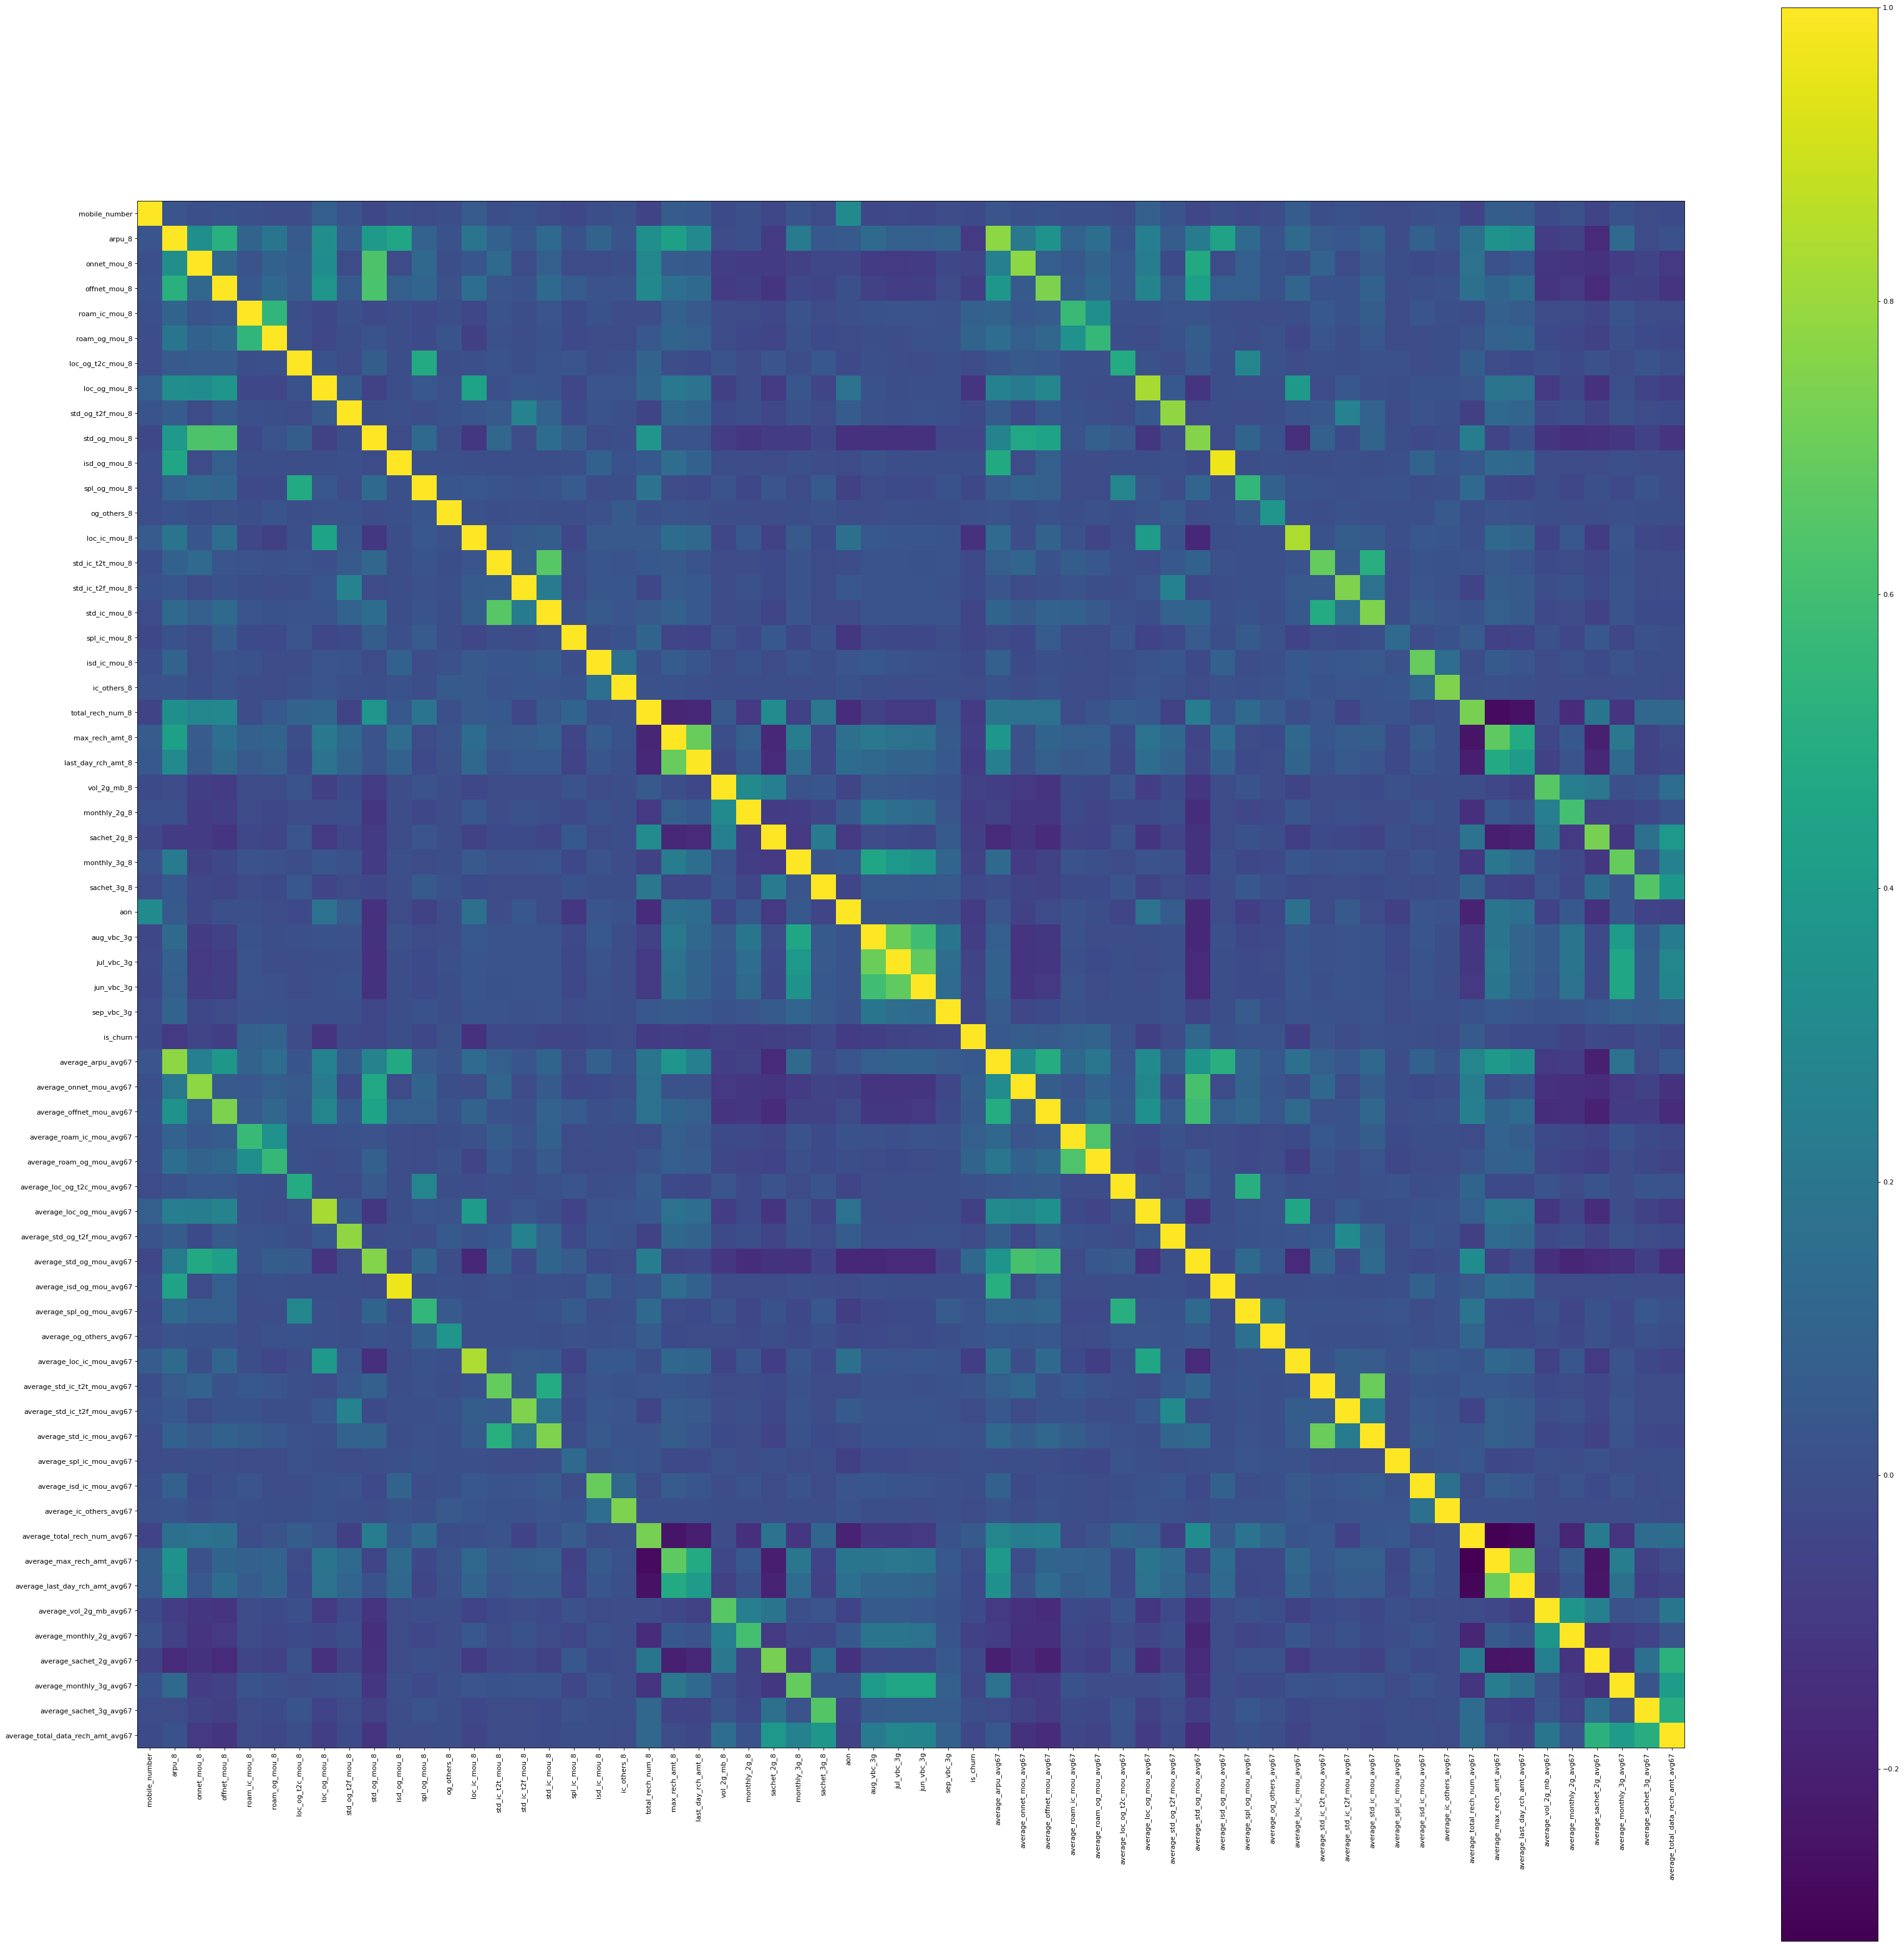

In [43]:
corr = telecom_premium_cust.corr()
plt.figure(num=None, figsize=(50,50), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.show()

## EDA

In [44]:
# Age of network field is in days. We are converting it into months for further analysis
telecom_premium_cust['aon_month'] = telecom_premium_cust['aon'] / 30
telecom_premium_cust.drop('aon', axis=1, inplace=True)

telecom_premium_cust['aon_month'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_month, dtype: float64

In [45]:
telecom_premium_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,is_churn,average_arpu_avg67,average_onnet_mou_avg67,average_offnet_mou_avg67,average_roam_ic_mou_avg67,average_roam_og_mou_avg67,average_loc_og_t2c_mou_avg67,average_loc_og_mou_avg67,average_std_og_t2f_mou_avg67,average_std_og_mou_avg67,average_isd_og_mou_avg67,average_spl_og_mou_avg67,average_og_others_avg67,average_loc_ic_mou_avg67,average_std_ic_t2t_mou_avg67,average_std_ic_t2f_mou_avg67,average_std_ic_mou_avg67,average_spl_ic_mou_avg67,average_isd_ic_mou_avg67,average_ic_others_avg67,average_total_rech_num_avg67,average_max_rech_amt_avg67,average_last_day_rch_amt_avg67,average_vol_2g_mb_avg67,average_monthly_2g_avg67,average_sachet_2g_avg67,average_monthly_3g_avg67,average_sachet_3g_avg67,average_total_data_rech_amt_avg67,aon_month
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,177.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.0,24.000000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,356.0,20.133333
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,12854.5,44.266667


C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers vs tenure')

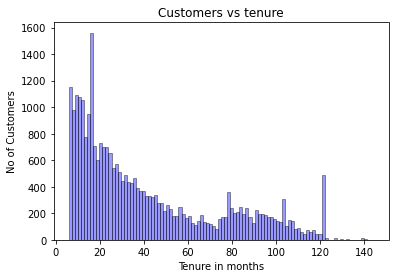

In [46]:
ax = sns.distplot(telecom_premium_cust['aon_month'], hist=True, kde=False, bins=int(100), color = 'blue', 
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Customers vs tenure')

Text(0.5, 1.0, 'Customers vs tenure')

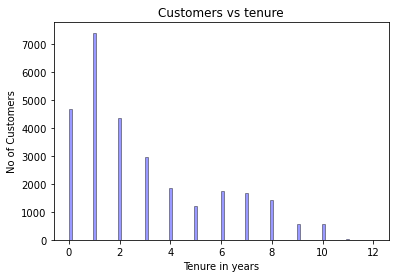

In [114]:
ax = sns.distplot(telecom_premium_cust['aon_month']//12, hist=True, kde=False, bins=int(100), color = 'blue', 
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in years')
ax.set_title('Customers vs tenure')

The graph clearly shows that number of customers who stays with a service falls as months increases.

<AxesSubplot:>

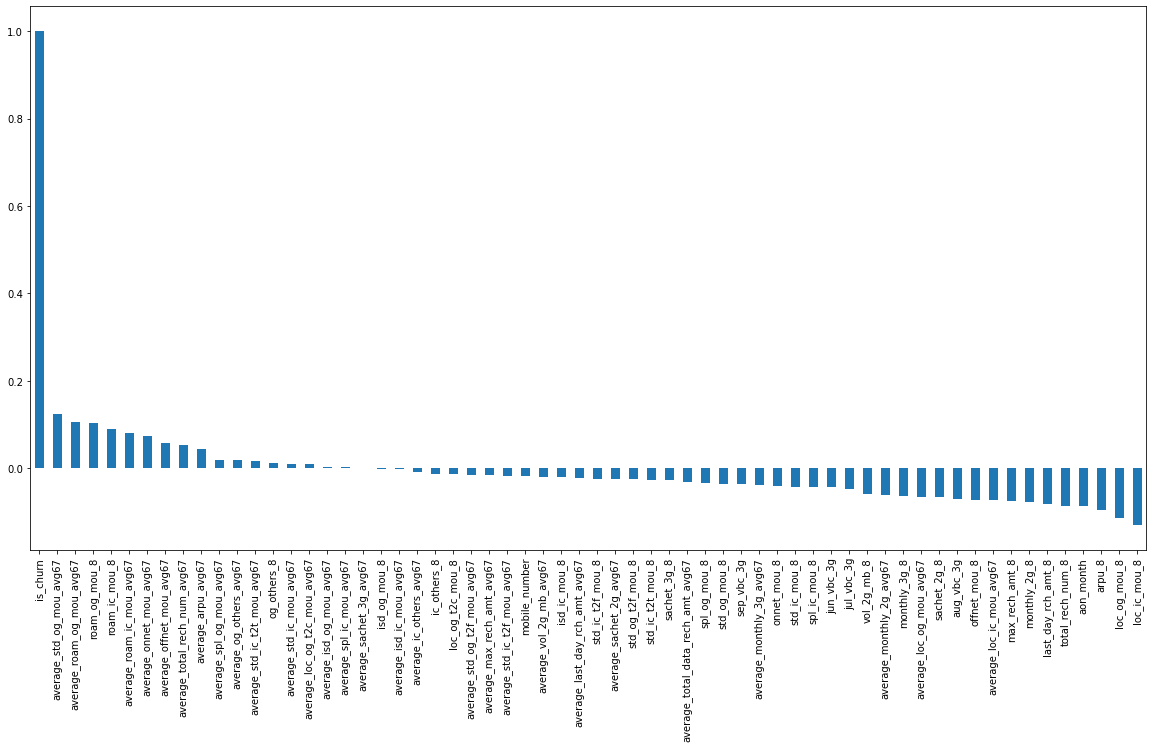

In [47]:
# now let's check the relationship of churn with other fields

plt.figure(figsize=(20,10))
telecom_premium_cust.corr()['is_churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='is_churn', ylabel='aon_month'>

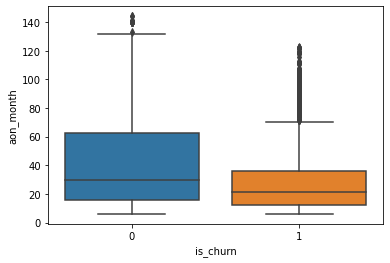

In [48]:
sns.boxplot(x = telecom_premium_cust.is_churn, y = telecom_premium_cust.aon_month)

The boxplot shows that the users who don't churn, are likely to stay with the provider for longer months

In [49]:
#As we have prepared the data, let's create a new dataframe for model creation


df = telecom_premium_cust.copy()
df.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,is_churn,average_arpu_avg67,average_onnet_mou_avg67,average_offnet_mou_avg67,average_roam_ic_mou_avg67,average_roam_og_mou_avg67,average_loc_og_t2c_mou_avg67,average_loc_og_mou_avg67,average_std_og_t2f_mou_avg67,average_std_og_mou_avg67,average_isd_og_mou_avg67,average_spl_og_mou_avg67,average_og_others_avg67,average_loc_ic_mou_avg67,average_std_ic_t2t_mou_avg67,average_std_ic_t2f_mou_avg67,average_std_ic_mou_avg67,average_spl_ic_mou_avg67,average_isd_ic_mou_avg67,average_ic_others_avg67,average_total_rech_num_avg67,average_max_rech_amt_avg67,average_last_day_rch_amt_avg67,average_vol_2g_mb_avg67,average_monthly_2g_avg67,average_sachet_2g_avg67,average_monthly_3g_avg67,average_sachet_3g_avg67,average_total_data_rech_amt_avg67,aon_month
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,26.733333
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,177.0,10.500000
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.0,24.000000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,356.0,20.133333
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,12854.5,44.266667


In [50]:
#Now, before creating the model, lets remove mobile number field as we dont need it anymore

df.drop('mobile_number', axis=1, inplace=True)

In [51]:
df.shape

(28504, 61)

In [52]:
y = df['is_churn']
X = df.drop(['is_churn'], axis=1)
df.drop('is_churn', axis=1, inplace=True)

In [53]:
X.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_arpu_avg67,average_onnet_mou_avg67,average_offnet_mou_avg67,average_roam_ic_mou_avg67,average_roam_og_mou_avg67,average_loc_og_t2c_mou_avg67,average_loc_og_mou_avg67,average_std_og_t2f_mou_avg67,average_std_og_mou_avg67,average_isd_og_mou_avg67,average_spl_og_mou_avg67,average_og_others_avg67,average_loc_ic_mou_avg67,average_std_ic_t2t_mou_avg67,average_std_ic_t2f_mou_avg67,average_std_ic_mou_avg67,average_spl_ic_mou_avg67,average_isd_ic_mou_avg67,average_ic_others_avg67,average_total_rech_num_avg67,average_max_rech_amt_avg67,average_last_day_rch_amt_avg67,average_vol_2g_mb_avg67,average_monthly_2g_avg67,average_sachet_2g_avg67,average_monthly_3g_avg67,average_sachet_3g_avg67,average_total_data_rech_amt_avg67,aon_month
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,526.058843,244.727998,350.226224,13.032309,20.751873,1.776181,247.319197,1.656881,320.454416,1.970780,6.835485,0.060633,234.326705,14.525961,2.684498,46.440159,0.027632,11.347455,1.278381,10.327463,163.318832,94.216321,108.771800,0.158644,1.088865,0.207199,0.205866,172.280825,179.720267,157.068192,8.314916,565.501897,270.591827,384.869679,14.594466,23.677577,1.764242,263.167116,1.862970,361.898989,2.035769,6.581346,0.357684,240.208739,15.481990,2.833753,49.136242,0.041446,11.406446,1.362417,11.964058,169.513437,100.108318,127.038150,0.182571,1.146646,0.212900,0.215935,486.177308,41.135194
std,500.754116,464.022072,485.648594,75.694636,107.133222,7.362037,368.788907,11.194302,615.718184,45.614753,20.721832,3.401041,312.168478,72.667698,20.388076,141.730296,0.113003,71.873037,13.085925,9.313595,170.633436,143.534703,316.643734,0.411761,2.561279,0.616018,1.110054,422.692163,445.647191,414.405091,53.215686,430.500472,442.557828,459.591466,66.323475,94.222061,6.523190,362.371159,11.739479,586.629514,45.267621,17.538457,2.520386,302.307449,76.467916,18.240245,135.706053,0.153782,74.458609,13.999861,8.660261,151.873426,113.747247,303.071958,0.391015,2.426111,0.564313,0.936235,1243.225315,32.139422
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-749.783000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,254.759000,14.840000,60.490000,0.000000,0.000000,0.000000,30.705000,0.000000,0.000000,0.000000,0.000000,0.000000,50.255000,0.000000,0.000000,0.910000,0.000000,0.000000,0.000000,4.000000,65.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,353.956

In [54]:
#As features are in different range, lets standardize it usind StandardScaler()

from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(X)
X = std_scaler.transform(X)
X

array([[ 5.28296718, -0.41472461, -0.05007046, ..., -0.23064542,
        -0.39106816, -0.44811364],
       [-0.77623658, -0.45181401, -0.440133  , ..., -0.23064542,
        -0.24869404, -0.95321352],
       [ 0.22306979, -0.34392932,  1.30377168, ..., -0.23064542,
        -0.39106816, -0.53316126],
       ...,
       [ 0.07643637,  1.14367687,  0.50492904, ..., -0.23064542,
        -0.37860037,  1.51627893],
       [-0.24758862, -0.52211363, -0.2098184 , ..., -0.23064542,
        -0.3291314 , -0.93973037],
       [ 0.16127591, -0.52741519, -0.72116417, ...,  0.30341771,
         0.60032222, -0.78415545]])

In [55]:
# Using train_test_split, creating test and train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (19952, 60)
X_test: (8552, 60)


Text(0, 0.5, 'Churn')

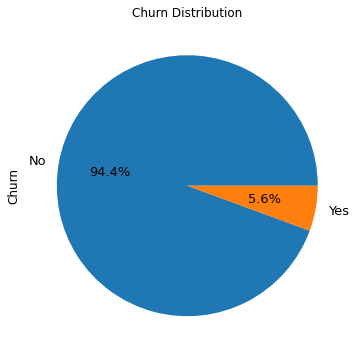

In [56]:
churn_dist = (telecom_premium_cust['is_churn'].value_counts()*100.0 /len(telecom_premium_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(6,6), fontsize=13 )                                                                           
churn_dist.set_title('Churn Distribution', fontsize = 12)
churn_dist.set_ylabel('Churn',fontsize = 12)


As we can see here, the distribution of churn data with respect to non-churn data is not equal. This will result in a bias towards Non Churn as the outcome.

In [58]:
#Let's do an over_sampling on the dataset so that we can train the model using a balanced dataset.

from imblearn.over_sampling import SMOTE


In [61]:
sm = SMOTE(random_state=100, sampling_strategy='auto')
X_tr,y_tr = sm.fit_resample(X_train,y_train)


<AxesSubplot:ylabel='is_churn'>

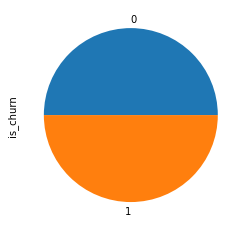

In [68]:
pd.DataFrame(y_tr)["is_churn"].value_counts().plot(kind='pie')


We have balanced the dataset for churn and non-churn data without any overfitting.

## Model Creation

In [75]:
#The below function is to show comparison between different performance metrics.

from sklearn.metrics import accuracy_score, recall_score, precision_score,  roc_auc_score, f1_score
from prettytable import PrettyTable
def evaluate_model(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    # F1 score
    f1 = round(f1_score(actual, pred)*100,2)
    
    
    
    table = PrettyTable()
    table.title = " Performance Metrics "
    table.field_names = ['Accuracy Score','Recall Score','Precision Score','ROC AUC Score','F1 Score']
    table.add_row([acc_score,rec_score,prec_score,roc_score,f1 ])
    print(table)
    
    
    return acc_score, roc_score, prec_score, rec_score,f1

In [109]:
def draw_roc(y_test, y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve( y_test, y_pred, drop_intermediate = False )
    auc_score = roc_auc_score( y_test, y_pred )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [116]:
#FIrst, we will try SVM with logistic regression

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svm = SVC(kernel='linear') 
svm.fit(X_tr,y_tr)
svc_pred = svm.predict(X_test)
evaluate_model(y_test, svc_pred)

+----------------------------------------------------------------------------+
|                            Performance Metrics                             |
+----------------+--------------+-----------------+---------------+----------+
| Accuracy Score | Recall Score | Precision Score | ROC AUC Score | F1 Score |
+----------------+--------------+-----------------+---------------+----------+
|     80.62      |    80.96     |      19.07      |     80.78     |  30.87   |
+----------------+--------------+-----------------+---------------+----------+


(80.62, 80.78, 19.07, 80.96, 30.87)

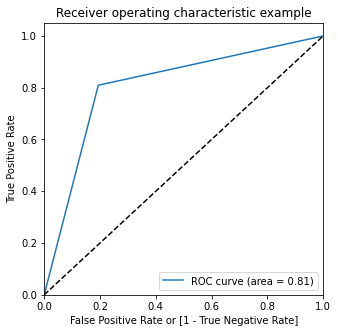

In [110]:
draw_roc(y_test, svc_pred)

In [82]:
#Lets use RFE for feature elimination with logisticregression
from sklearn.feature_selection import RFE
lr = LogisticRegression()

rfe = RFE(lr,  n_features_to_select = 15)                                 
rfe = rfe.fit(X_tr, y_tr)
rfe_features = list(df.columns[rfe.support_])
print("Features: ", rfe_features)

Features:  ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'average_arpu_avg67', 'average_loc_ic_mou_avg67', 'aon_month']


In [83]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [85]:
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)
evaluate_model(y_test, y_pred)

+----------------------------------------------------------------------------+
|                            Performance Metrics                             |
+----------------+--------------+-----------------+---------------+----------+
| Accuracy Score | Recall Score | Precision Score | ROC AUC Score | F1 Score |
+----------------+--------------+-----------------+---------------+----------+
|     78.13      |     81.4     |      17.25      |     79.67     |  28.46   |
+----------------+--------------+-----------------+---------------+----------+


(78.13, 79.67, 17.25, 81.4, 28.46)

In [86]:
#Now, lets try PCA along with logistic regression

from sklearn.decomposition import PCA
pca = PCA(random_state=10)
X_tr_pca=pca.fit_transform(X_tr)
X_test_pca = pca.transform(X_test)

lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

y_pred = lr_pca.predict(X_test_pca)
y_pred_df = pd.DataFrame(y_pred)
evaluate_model(y_test, y_pred)

+----------------------------------------------------------------------------+
|                            Performance Metrics                             |
+----------------+--------------+-----------------+---------------+----------+
| Accuracy Score | Recall Score | Precision Score | ROC AUC Score | F1 Score |
+----------------+--------------+-----------------+---------------+----------+
|     79.75      |    80.74     |      18.33      |     80.22     |  29.88   |
+----------------+--------------+-----------------+---------------+----------+


(79.75, 80.22, 18.33, 80.74, 29.88)

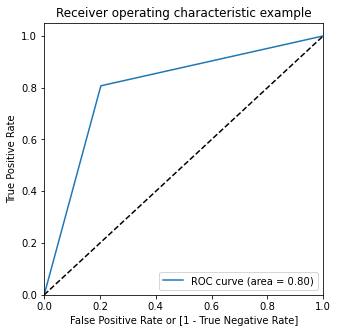

In [112]:
draw_roc(y_test, lr_pca.predict(X_test_pca))

**Random Forest Classifier**

In [89]:
#Using default hyperparameters

from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_rfe, y_tr)
rfc_pred = model_rfc.predict(X_test_rfe)
evaluate_model(y_test, rfc_pred)

+----------------------------------------------------------------------------+
|                            Performance Metrics                             |
+----------------+--------------+-----------------+---------------+----------+
| Accuracy Score | Recall Score | Precision Score | ROC AUC Score | F1 Score |
+----------------+--------------+-----------------+---------------+----------+
|     92.47      |     55.8     |      36.59      |     75.17     |  44.19   |
+----------------+--------------+-----------------+---------------+----------+


(92.47, 75.17, 36.59, 55.8, 44.19)

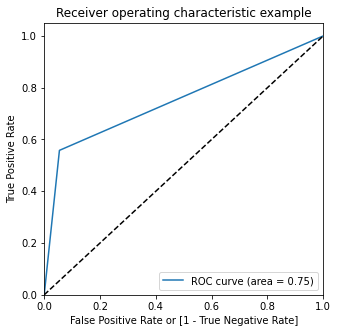

In [113]:
draw_roc(y_test, rfc_pred)

In [ ]:
lr_pca.predict(X_test_pca)

In [90]:
#Now, lets try hyperparameter tuning

model_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameters = {'min_samples_leaf': range(50, 400, 10)}
rfc = RandomForestClassifier()
rf = GridSearchCV(rfc, parameters, cv=5,scoring="accuracy")
rf.fit(X_rfe, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             scoring='accuracy')

In [93]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.130725,0.036553,0.039002,0.002191,2,{'max_depth': 2},0.844539,0.855282,0.857674,0.855017,0.865648,0.855632,0.006753,4
1,2.806066,0.060632,0.064007,0.005619,7,{'max_depth': 7},0.867659,0.892093,0.889169,0.883189,0.896877,0.885798,0.010095,3
2,4.116117,0.084267,0.089590,0.002978,12,{'max_depth': 12},0.905660,0.930233,0.927442,0.922392,0.933555,0.923856,0.009806,2
3,4.774762,0.087683,0.106003,0.003163,17,{'max_depth': 17},0.925060,0.954153,0.946711,0.946578,0.950299,0.944560,0.010138,1


In [102]:
param_grid = {
    'min_samples_split': range(200, 500, 100),
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)
grid_search.fit(X_rfe, y_tr)
print('Accuracy =',grid_search.best_score_,'using parameters: ',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy = 0.8783553925477064 using parameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 700}


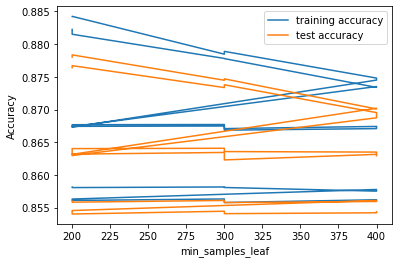

In [104]:
scores = grid_search.cv_results_
scores
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [98]:
rfc_model = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
evaluate_model(y_test, y_pred)

+----------------------------------------------------------------------------+
|                            Performance Metrics                             |
+----------------+--------------+-----------------+---------------+----------+
| Accuracy Score | Recall Score | Precision Score | ROC AUC Score | F1 Score |
+----------------+--------------+-----------------+---------------+----------+
|     95.09      |    17.07     |      65.55      |     58.28     |  27.08   |
+----------------+--------------+-----------------+---------------+----------+


(95.09, 58.28, 65.55, 17.07, 27.08)

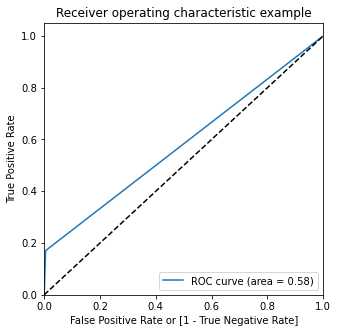

In [107]:
draw_roc(y_test, y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve( y_test, y_pred, drop_intermediate = False )
    auc_score = roc_auc_score( y_test, y_pred )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Observations :

Even though techniques like hyperparameter tuning improved the model accuracy, ROC Score reduced drastically/\.
Hence, SVC and Logistic Regression performs more better than RandomForestClassifier in this data.



- Only few premium customers tend to churn according to the data.
- Most of the customers in this data are new to the service
- Maximum Recharge Amount, Standard Outgoing Calls and Revenue Per Customer are good indicators of churn
- Data in the 8th month is crucial for churn analysis
